In [14]:
import numpy as np
import matplotlib.pyplot as plt
import jax.numpy as jnp
from jax import grad
import sympy as sp


### Functions Visuals

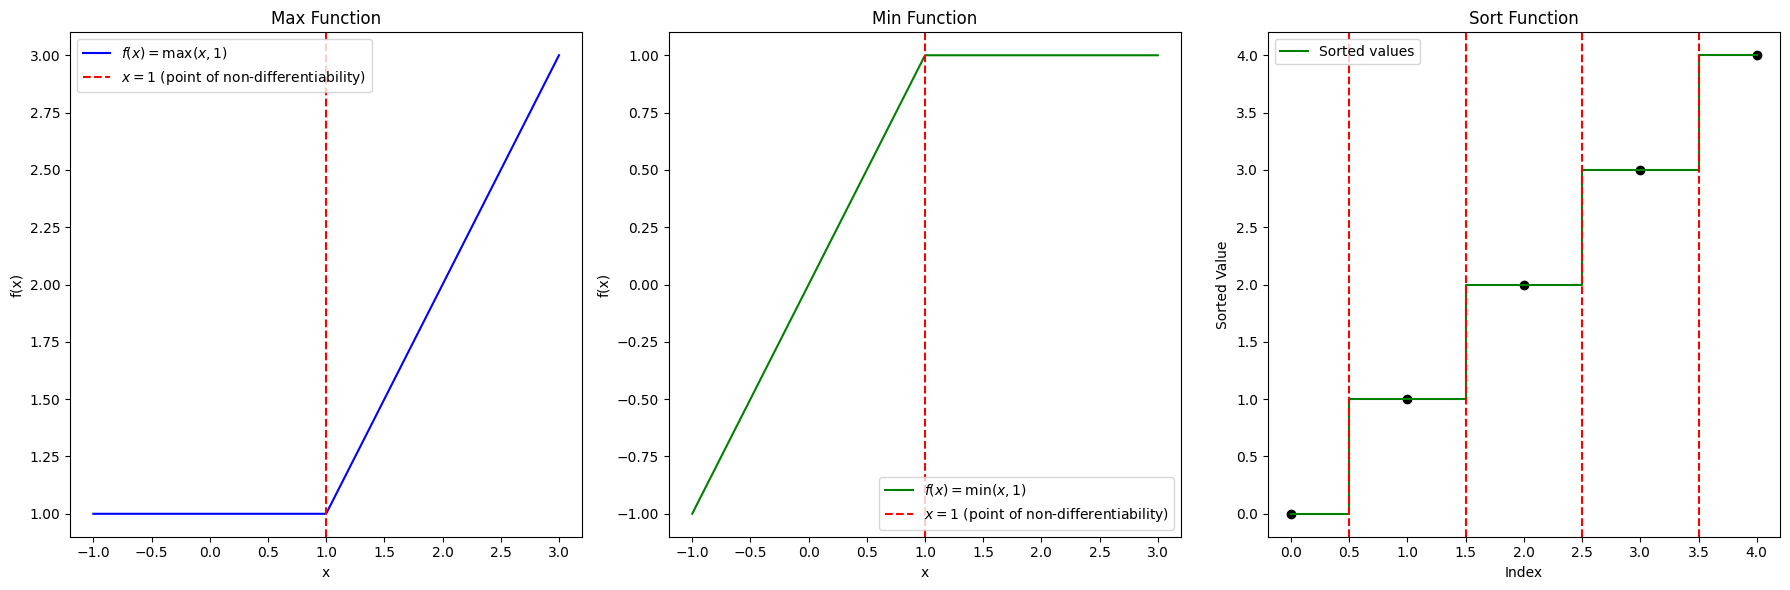

In [19]:


x = np.linspace(-1, 3, 400)
y_max = np.maximum(x, 1)
y_min = np.minimum(x, 1)
x_values = np.array([2, 3, 1, 4, 0])
sorted_values = np.sort(x_values)


plt.figure(figsize=(18, 6))  

# Max function plot
plt.subplot(1, 3, 1)  
plt.plot(x, y_max, label=r"$f(x) = \max(x, 1)$", color="blue")
plt.axvline(1, color="red", linestyle="--", label=r"$x=1$ (point of non-differentiability)")
plt.title("Max Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Min function plot
plt.subplot(1, 3, 2) 
plt.plot(x, y_min, label=r"$f(x) = \min(x, 1)$", color="green")
plt.axvline(1, color="red", linestyle="--", label=r"$x=1$ (point of non-differentiability)")
plt.title("Min Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

# Sort function plot
plt.subplot(1, 3, 3)
plt.step(np.arange(len(sorted_values)), sorted_values, where="mid", label="Sorted values", color="green")
plt.scatter(np.arange(len(x_values)), sorted_values, color="black")

for i in range(1, len(sorted_values)):
    if sorted_values[i] != sorted_values[i - 1]:
        plt.axvline(i-0.5, color="red", linestyle="--")  
plt.title("Sort Function")
plt.xlabel("Index")
plt.ylabel("Sorted Value")
plt.legend()

plt.tight_layout()
plt.show()


### max()

In [15]:
def max_function(x):
    return jnp.max(x)


def finite_difference(func, x, h=1e-4):
    grad_approx = np.zeros_like(x)
    for i in range(len(x)):  # Iterate over each component
        x_plus = x.copy()
        x_plus[i] += h  # Perturb one component by h
        grad_approx[i] = (func(x_plus) - func(x)) / h
    return grad_approx

test_cases = [
    jnp.array([3.0, 1.0, 2.0]),
    jnp.array([1.0, 2.0, 2.0]),
    jnp.array([2.0, 2.0, 2.0])
]

results = []

for x in test_cases:
    jax_grad = grad(max_function)(x)

    fd_grad = finite_difference(lambda x: np.max(x), np.array(x))


    results.append({
        "Input": x,
        "JAX Gradient": jax_grad,
        "Finite Difference Gradient": fd_grad,
        
    })

results

[{'Input': Array([3., 1., 2.], dtype=float32),
  'JAX Gradient': Array([1., 0., 0.], dtype=float32),
  'Finite Difference Gradient': array([0.99897385, 0.        , 0.        ], dtype=float32)},
 {'Input': Array([1., 2., 2.], dtype=float32),
  'JAX Gradient': Array([0. , 0.5, 0.5], dtype=float32),
  'Finite Difference Gradient': array([0.        , 0.99897385, 0.99897385], dtype=float32)},
 {'Input': Array([2., 2., 2.], dtype=float32),
  'JAX Gradient': Array([0.33333334, 0.33333334, 0.33333334], dtype=float32),
  'Finite Difference Gradient': array([0.99897385, 0.99897385, 0.99897385], dtype=float32)}]

### min()

In [16]:
# Test function using max
def min_function(x):
    return jnp.min(x)

# Finite difference gradient function
def finite_difference(func, x, h=1e-4):
    grad_approx = np.zeros_like(x)
    for i in range(len(x)):  # Iterate over each component
        x_plus = x.copy()
        x_plus[i] += h  # Perturb one component by h
        grad_approx[i] = (func(x_plus) - func(x)) / h
    return grad_approx

# Test cases
test_cases = [
    jnp.array([3.0, 1.0, 2.0]),
    jnp.array([1.0, 2.0, 2.0]),
    jnp.array([2.0, 2.0, 2.0])
]

results = []

for x in test_cases:
    # Compute the gradient using JAX
    jax_grad = grad(min_function)(x)

    # Compute the gradient using finite difference method
    fd_grad = finite_difference(lambda x: np.min(x), np.array(x))

 

    results.append({
        "Input": x,
        "JAX Gradient": jax_grad,
        "Finite Difference Gradient": fd_grad,
        
    })

results

[{'Input': Array([3., 1., 2.], dtype=float32),
  'JAX Gradient': Array([0., 1., 0.], dtype=float32),
  'Finite Difference Gradient': array([0.       , 1.0001659, 0.       ], dtype=float32)},
 {'Input': Array([1., 2., 2.], dtype=float32),
  'JAX Gradient': Array([1., 0., 0.], dtype=float32),
  'Finite Difference Gradient': array([1.0001659, 0.       , 0.       ], dtype=float32)},
 {'Input': Array([2., 2., 2.], dtype=float32),
  'JAX Gradient': Array([0.33333334, 0.33333334, 0.33333334], dtype=float32),
  'Finite Difference Gradient': array([0., 0., 0.], dtype=float32)}]

### sort(), three methods comparision

In [17]:
def sort_function(x):
    return jnp.sort(x)[-1]  # Return the largest value after sorting

def finite_difference(func, x, h=1e-4):
    grad_approx = np.zeros_like(x)
    for i in range(len(x)):  # Iterate over each component
        x_plus = x.copy()
        x_plus[i] += h  # Perturb one component by h
        grad_approx[i] = (func(x_plus) - func(x)) / h
    return grad_approx

def symbolic_gradient_sort(x):
    x_symbols = sp.symbols(f"x0:{len(x)}")
    max_val = sp.Max(*x_symbols) 
    gradients = [sp.diff(max_val, xi) for xi in x_symbols]
    subs = {x_symbols[i]: x[i] for i in range(len(x))}
    grad_values = [float(grad.evalf(subs=subs)) for grad in gradients]

    return np.array(grad_values)



test_cases = [
    jnp.array([3.0, 1.0, 2.0]),  # Case 1: Distinct values
    jnp.array([1.0, 2.0, 2.0]),  # Case 2: Tied maximum values
    jnp.array([2.0, 2.0, 2.0])   # Case 3: All values are equal
]

for idx, x in enumerate(test_cases):
    jax_grad = grad(sort_function)(x)
    
    fd_grad = finite_difference(lambda y: np.sort(y)[-1], np.array(x))
    
    sym_grad = symbolic_gradient_sort(np.array(x))
    
    # Print results
    print(f"\nTest Case {idx + 1}: Input = {x}")
    print("JAX Gradient:\n", jax_grad)
    print("Finite Difference Gradient:\n", fd_grad)
    print("Symbolic Gradient:\n", sym_grad)
    


Test Case 1: Input = [3. 1. 2.]
JAX Gradient:
 [1. 0. 0.]
Finite Difference Gradient:
 [0.99897385 0.         0.        ]
Symbolic Gradient:
 [1. 0. 0.]

Test Case 2: Input = [1. 2. 2.]
JAX Gradient:
 [0. 0. 1.]
Finite Difference Gradient:
 [0.         0.99897385 0.99897385]
Symbolic Gradient:
 [0.  0.5 0.5]

Test Case 3: Input = [2. 2. 2.]
JAX Gradient:
 [0. 0. 1.]
Finite Difference Gradient:
 [0.99897385 0.99897385 0.99897385]
Symbolic Gradient:
 [0.5 0.5 0.5]
